In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive")

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/train')
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['dogs', 'cats']

In [ ]:
# tensorflow libraries/dependencies
import tensorflow as tf
from tensorflow import keras
print(f"Tensorflow Version: {tf.__version__}")
print(f"Number of GPUs Available: {len(tf.config.list_physical_devices('GPU'))}")

Tensorflow Version: 2.13.0
Number of GPUs Available: 0


In [ ]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 5.5 MB/s eta 0:00:00


In [ ]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/test'

In [ ]:
# # creating instances of ```ImageDataGenerator``` class
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# trainDatagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40,
#                                   width_shift_range=0.2, height_shift_range=0.2,
#                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
from keras.utils import image_dataset_from_directory
train_generator = image_dataset_from_directory(train_dir, image_size=(64, 64), batch_size=32)
test_generator = image_dataset_from_directory(test_dir, image_size=(64, 64), batch_size=32)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


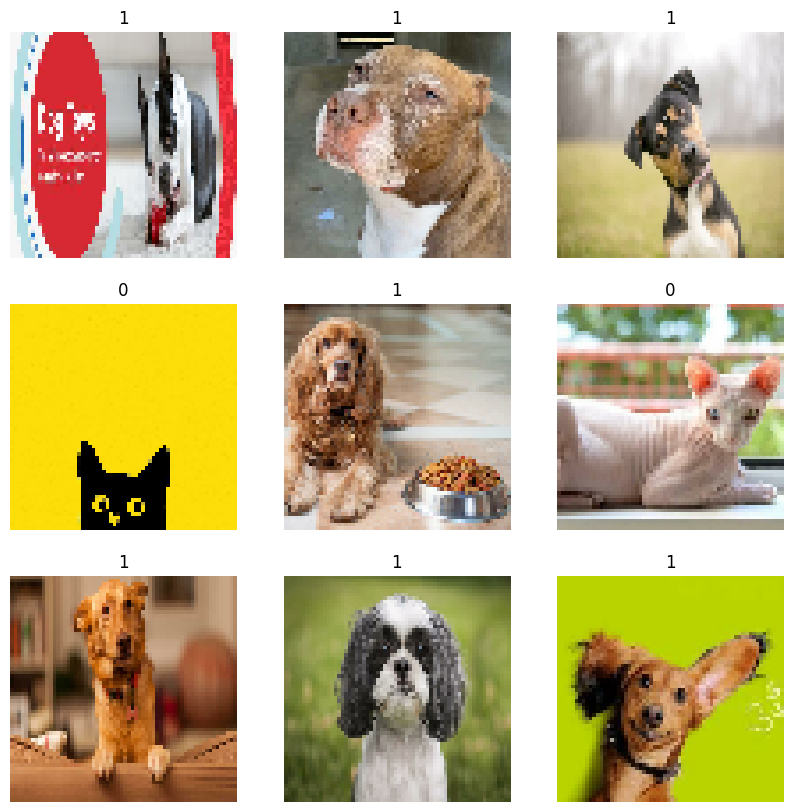

In [ ]:
import matplotlib.pyplot as plt

# showing only the first 10 samples of our training data set
plt.figure(figsize=(10, 10))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
# building CNN
model = keras.Sequential([
    # Conv layer 1:
    keras.layers.Conv2D(128, (3, 3), input_shape=(64,64,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),

    # Conv layer 2:
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),

    # Conv layer 3:
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),

    keras.layers.Flatten(),

    # fully connected layers:
    keras.layers.Dense(units = 128, activation = 'relu'),
    keras.layers.Dense(units =1, activation = 'sigmoid')

])

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics ='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       3584      
                                                                 
 batch_normalization (Batch  (None, 62, 62, 128)       512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        73792     
                                                                 
 batch_normalization_1 (Bat  (None, 29, 29, 64)        256       
 chNormalization)                                                
                                                        

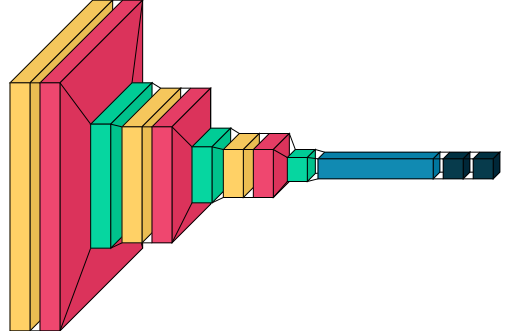

In [ ]:
import visualkeras
visualkeras.layered_view(model)

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
red_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1, verbose=1)
logs = model.fit(train_generator, epochs=10, validation_data=test_generator,validation_steps=2000/32, callbacks=[es, red_lr])

Epoch 1/10
18/18 [==============================] - ETA: 0s - loss: 0.9287 - accuracy: 0.5655

18/18 [==============================] - 86s 5s/step - loss: 0.9287 - accuracy: 0.5655 - val_loss: 2.0947 - val_accuracy: 0.5071 - lr: 0.0010
Epoch 2/10
18/18 [==============================] - ETA: 0s - loss: 0.4077 - accuracy: 0.8259

18/18 [==============================] - 17s 881ms/step - loss: 0.4077 - accuracy: 0.8259 - lr: 0.0010
Epoch 3/10
18/18 [==============================] - ETA: 0s - loss: 0.2413 - accuracy: 0.9282

18/18 [==============================] - 16s 814ms/step - loss: 0.2413 - accuracy: 0.9282 - lr: 0.0010
Epoch 4/10
18/18 [==============================] - ETA: 0s - loss: 0.1221 - accuracy: 0.9803

18/18 [==============================] - 16s 807ms/step - loss: 0.1221 - accuracy: 0.9803 - lr: 0.0010
Epoch 5/10
18/18 [==============================] - ETA: 0s - loss: 0.0606 - accuracy: 0.9928

18/18 [==============================] - 16s 822ms/step - loss: 0.0606 - accuracy: 0.9928 - lr: 0.0010
Epoch 6/10
18/18 [==============================] - ETA: 0s - loss: 0.0302 - accuracy: 0.9982

18/18 [==============================] - 16s 820ms/step - loss: 0.0302 - accuracy: 0.9982 - lr: 0.0010
Epoch 7/10
18/18 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 1.0000

18/18 [==============================] - 18s 838ms/step - loss: 0.0175 - accuracy: 1.0000 - lr: 0.0010
Epoch 8/10
18/18 [==============================] - ETA: 0s - loss: 0.0106 - accuracy: 1.0000

18/18 [==============================] - 16s 807ms/step - loss: 0.0106 - accuracy: 1.0000 - lr: 0.0010
Epoch 9/10
18/18 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 1.0000

18/18 [==============================] - 16s 810ms/step - loss: 0.0075 - accuracy: 1.0000 - lr: 0.0010
Epoch 10/10
18/18 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 1.0000

18/18 [==============================] - 16s 813ms/step - loss: 0.0055 - accuracy: 1.0000 - lr: 0.0010


Plotting Training curve:


In [ ]:
import matplotlib.pyplot as plt
plt.title('Training Log')
plt.plot(logs.history['loss'], label='Training Loss')
plt.plot(logs.history['accuracy'], label='Training Accuracy')
# plt.plot(logs.history['val_loss'], label='Validation Loss', linewidth=3)
# plt.plot(logs.history['val_accuracy'], label='Validation accuracy', linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.show()